In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [ ]:
%matplotlib inline

In [122]:
enq=pd.read_csv('jan enq.csv')

In [123]:
enq.drop(["CUST_MOBILE","MSPIN","EMAIL_ID","ENQ_NUM","DEALER_NAME","DEALER CODE-FOR CODE","CUST_NAME","DLR_CITY","TEST_DRIVE_NO","DSE_NAME","DSE_DESIGNATION","DEALER CODE-FOR CODE"],axis=1,inplace=True)

In [124]:
enq.head()

,ENQ_DATE,CUST_PROFESSION,USAGE_AREA,BUYER_TYPE,MANUFACTURER,MODEL,SUBMODEL,SUB_MODEL_DESC,COLOUR,BUDGET,AGE_OF_OLD_CAR,REG_NO1,ENQ_SOURCE,TEST_DRIVE,ENQ_MODE,ENQ_STATUS,CUST_GENDER,ENQ_DAY,CAR_TYPE
0,11-Jan-22,Salaried,Self-Driving,First Time Buyer,MARUTI,NEW SWIFT,SMR4CD3,MARUTI SWIFT VXI BSIV,-,400000.0,5.0,TN23CA3719,Showroom Walk-In,N,M-APP,Cold,Male,Tuesday,Hatchback
1,20-Jan-22,Salaried,Self-Driving,First Time Buyer,MARUTI,EECO,VRRPBAF,MARUTI EECO 5 STR AC 1.2L 5MT,METALLIC,125000.0,7.0,TN34AX4359,Website,N,APP,Postponed,Male,Thursday,Van
2,28-Jan-22,Salaried,Self-Driving,First Time Buyer,MARUTI,SWIFT,KR4CD2,SWIFT VXi,-,375000.0,8.0,TN38AH1065,Showroom Walk-In,N,M-APP,Cold,Male,Friday,Hatchback
3,19-Jan-22,Self Employed,Self-Driving,First Time Buyer,MARUTI,M 800,MB,M800 - Others,-,280000.0,10.0,TN33AB4014,Showroom Walk-In,Y,NaN,Invoiced,Female,Wednedsay,Hatchback
4,28-Jan-22,Self Employed,Self-Driving,First Time Buyer,MARUTI,OMNI,MT,OMNI - Others,-,100000.0,15.0,TN38Y1906,Website,N,M-APP,Invoiced,Female,Friday,Van


In [125]:
enq.dtypes

ENQ_DATE            object
CUST_PROFESSION     object
USAGE_AREA          object
BUYER_TYPE          object
MANUFACTURER        object
MODEL               object
SUBMODEL            object
SUB_MODEL_DESC      object
COLOUR              object
BUDGET             float64
AGE_OF_OLD_CAR     float64
REG_NO1             object
ENQ_SOURCE          object
TEST_DRIVE          object
ENQ_MODE            object
ENQ_STATUS          object
CUST_GENDER         object
ENQ_DAY             object
CAR_TYPE            object
dtype: object

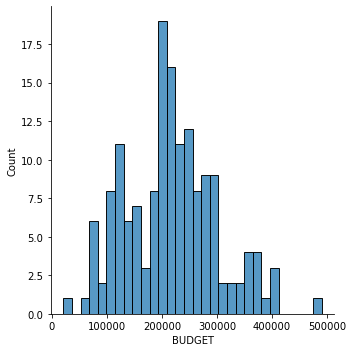

In [100]:
sns.displot(enq['BUDGET'],bins=30)

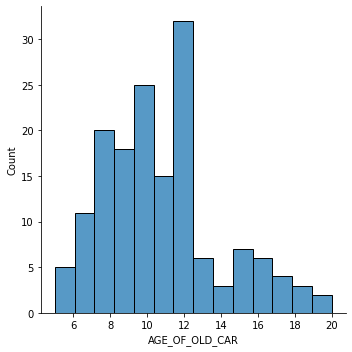

In [12]:
sns.displot(enq['AGE_OF_OLD_CAR'])

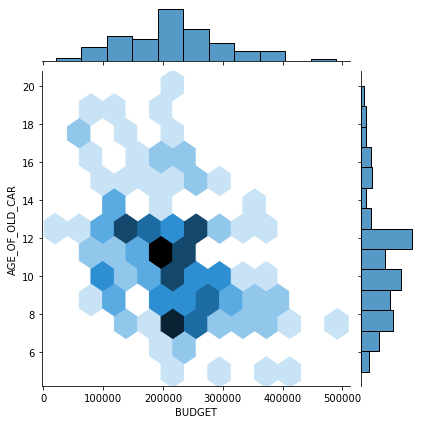

In [94]:
sns.jointplot(x='BUDGET',y='AGE_OF_OLD_CAR',data=enq,kind='hex')

<AxesSubplot:xlabel='ENQ_MODE', ylabel='Count'>

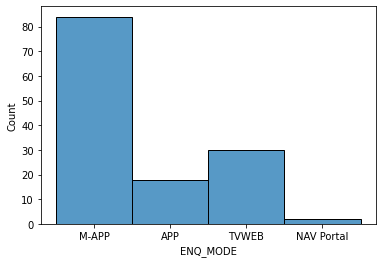

In [16]:
sns.histplot(enq["ENQ_MODE"])

<AxesSubplot:xlabel='ENQ_STATUS', ylabel='count'>

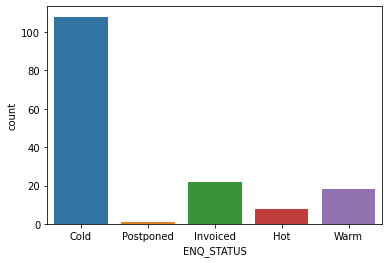

In [18]:
sns.countplot(x="ENQ_STATUS",data=enq)

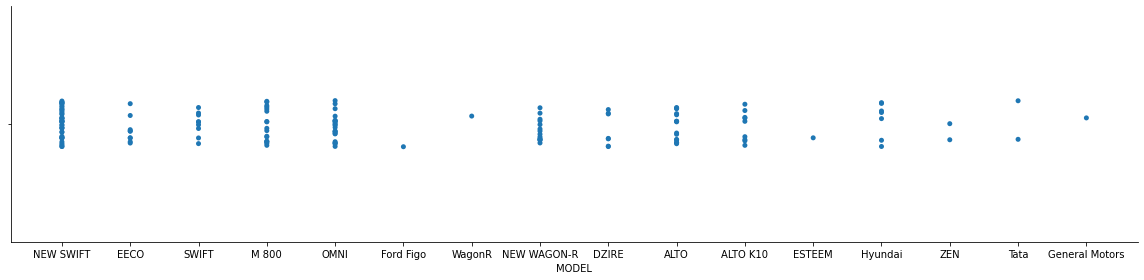

In [103]:
sns.catplot(x="MODEL",data=enq,height=4,aspect=4)

<AxesSubplot:xlabel='ENQ_SOURCE', ylabel='count'>

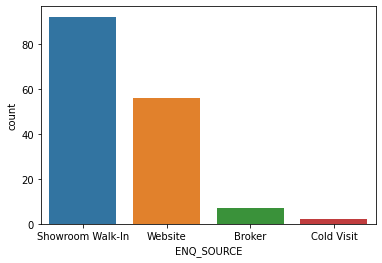

In [22]:
sns.countplot(x="ENQ_SOURCE",data=enq)

<AxesSubplot:xlabel='CUST_GENDER', ylabel='BUDGET'>

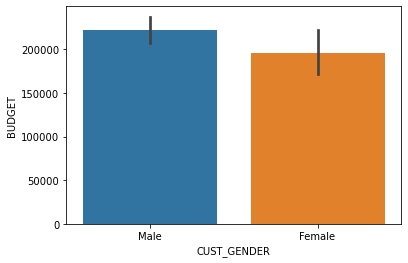

In [23]:
sns.barplot(x='CUST_GENDER',y='BUDGET',data=enq)

<AxesSubplot:xlabel='ENQ_MODE', ylabel='BUDGET'>

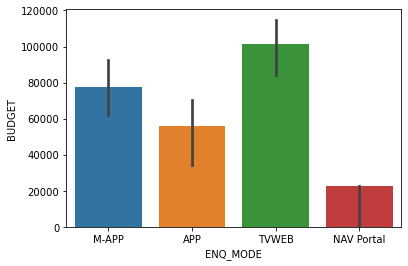

In [24]:
sns.barplot(x='ENQ_MODE',y='BUDGET',data=enq,estimator=np.std)

<AxesSubplot:xlabel='CAR_TYPE', ylabel='BUDGET'>

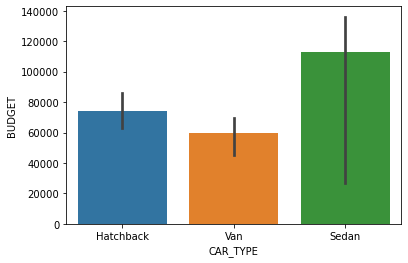

In [25]:
sns.barplot(x='CAR_TYPE',y='BUDGET',data=enq,estimator=np.std)

<AxesSubplot:xlabel='ENQ_DAY', ylabel='BUDGET'>

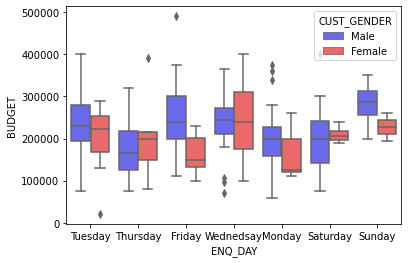

In [109]:
sns.boxplot(x="ENQ_DAY", y="BUDGET", data=enq,palette='seismic',hue='CUST_GENDER')

<AxesSubplot:xlabel='ENQ_MODE', ylabel='BUDGET'>

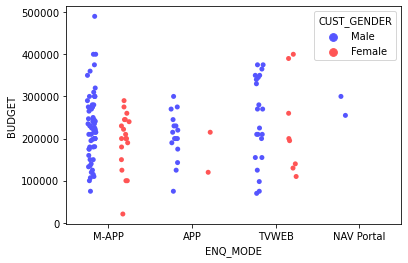

In [111]:
sns.stripplot(x="ENQ_MODE",y="BUDGET", data=enq,jitter=True,hue='CUST_GENDER',palette='seismic',dodge=True)

<AxesSubplot:xlabel='CAR_TYPE', ylabel='BUDGET'>

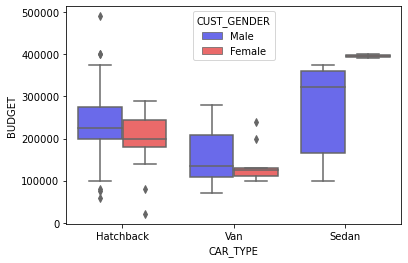

In [28]:
sns.boxplot(x="CAR_TYPE", y="BUDGET", data=enq,palette='seismic',hue='CUST_GENDER')

<AxesSubplot:xlabel='ENQ_MODE', ylabel='BUDGET'>

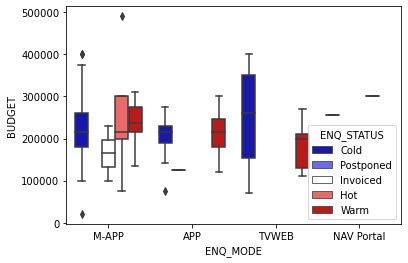

In [30]:
sns.boxplot(x="ENQ_MODE", y="BUDGET", data=enq,palette='seismic',hue='ENQ_STATUS')

<AxesSubplot:xlabel='CAR_TYPE', ylabel='ENQ_DAY'>

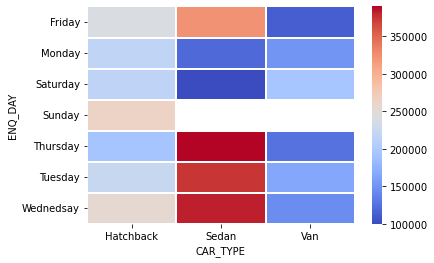

In [86]:
pvenq = enq.pivot_table(values='BUDGET',index='ENQ_DAY',columns='CAR_TYPE')
sns.heatmap(pvenq,cmap='coolwarm',linecolor='white',linewidths=2)

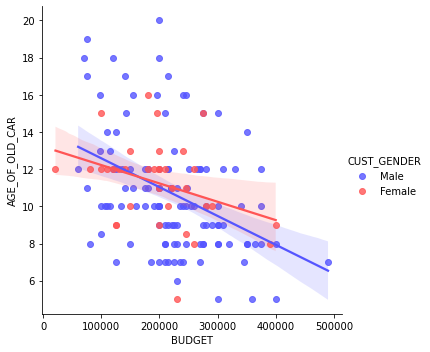

In [32]:
sns.lmplot(x='BUDGET',y='AGE_OF_OLD_CAR',data=enq,hue='CUST_GENDER',palette='seismic')

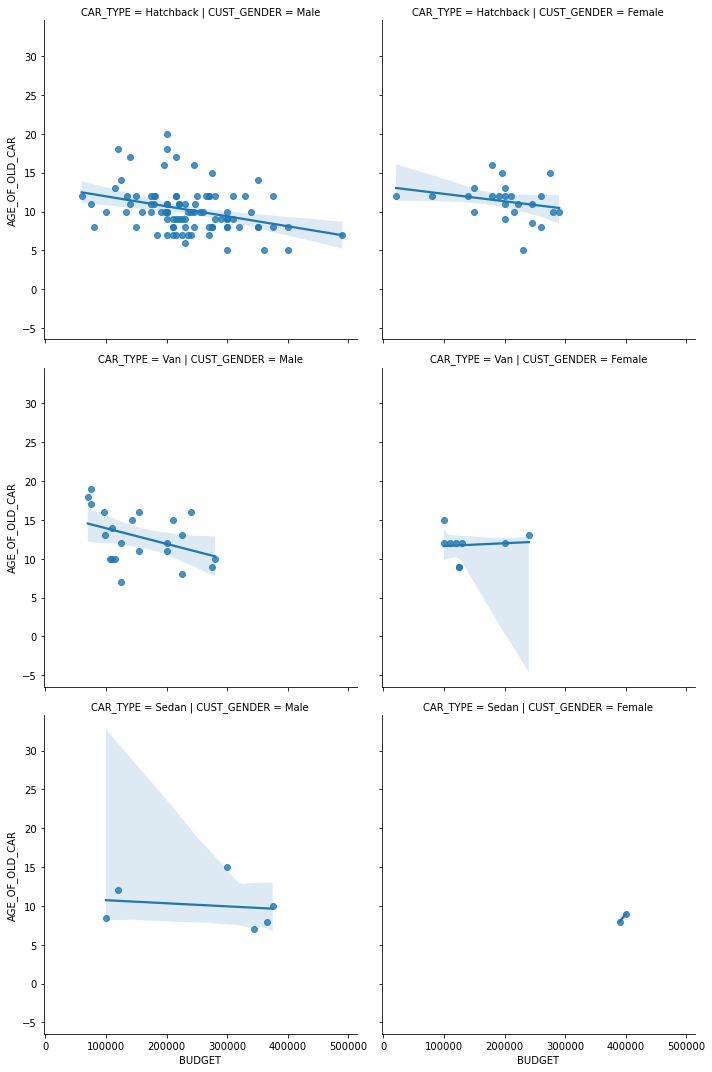

In [36]:
sns.lmplot(x='BUDGET',y='AGE_OF_OLD_CAR',data=enq,col='CUST_GENDER',row='CAR_TYPE')

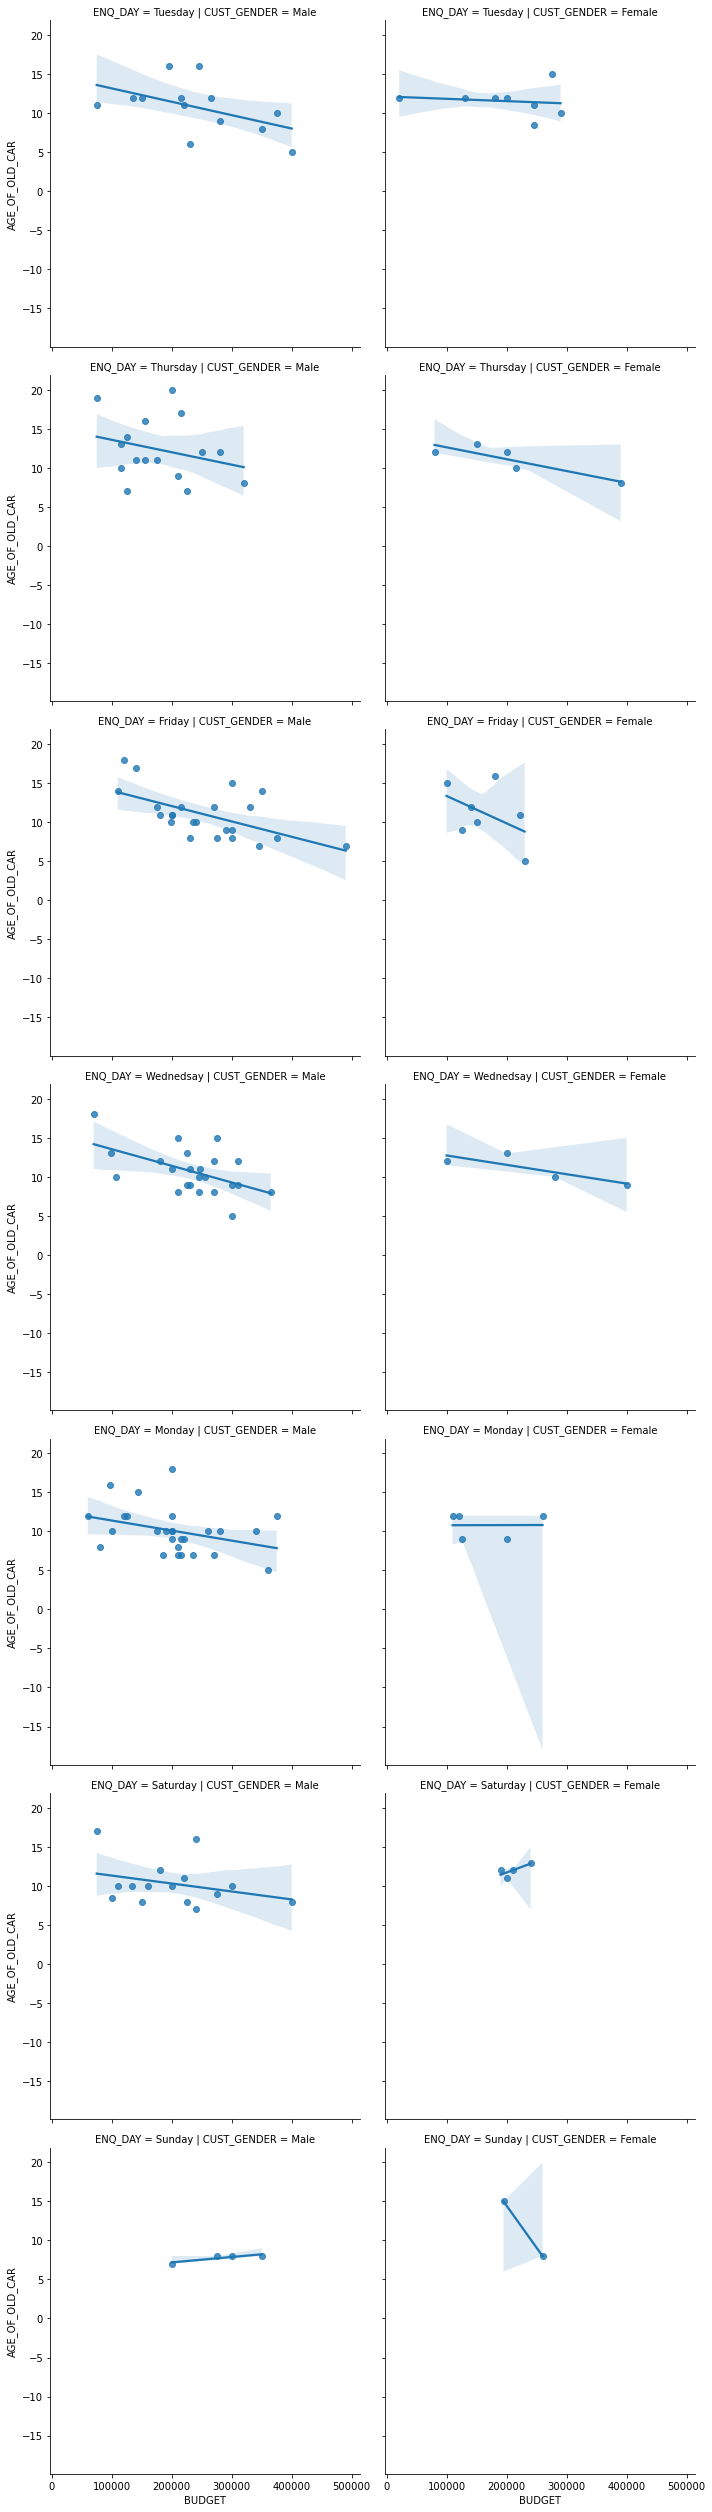

In [37]:
sns.lmplot(x='BUDGET',y='AGE_OF_OLD_CAR',data=enq,col='CUST_GENDER',row='ENQ_DAY')

In [117]:
cenq=enq.groupby('CAR_TYPE')
cenq.describe()

BUDGET                                                              \
           count           mean            std       min       25%       50%   
CAR_TYPE                                                                       
Hatchback  117.0  227844.444444   74795.699264   21000.0  190000.0  220000.0   
Sedan        8.0  299375.000000  120932.020455  100000.0  255000.0  355000.0   
Van         31.0  150516.129032   60877.949466   70000.0  108500.0  125000.0   

                              AGE_OF_OLD_CAR                                  \
                75%       max          count       mean       std  min   25%   
CAR_TYPE                                                                       
Hatchback  270000.0  490000.0          117.0  10.448718  2.835569  5.0   8.0   
Sedan      378750.0  400000.0            9.0  10.500000  3.464102  7.0   8.0   
Van        200000.0  280000.0           31.0  12.516129  2.998566  7.0  10.0   

                             
            50%   75%   max  
CAR_TYPE                     
Hatchback  10.0  12.0  20.0  
Sedan       9.0  12.0  17.0  
Van        12.0  15.0  19.0

CAR_TYPE
Hatchback    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Sedan        [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Van          [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

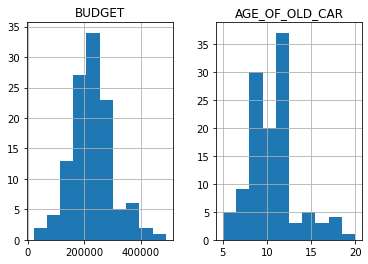

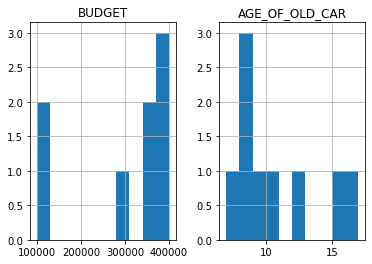

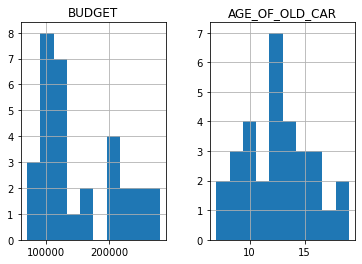

In [71]:
cenq.hist()

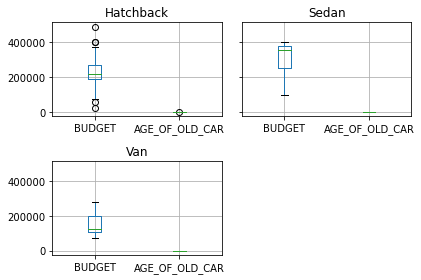

In [87]:
cenq.boxplot()
plt.tight_layout()

In [88]:
genq=enq.groupby('CUST_GENDER')
genq.describe()

BUDGET                                                            \
             count           mean           std      min       25%       50%   
CUST_GENDER                                                                    
Female        35.0  195942.857143  79857.204492  21000.0  135000.0  200000.0   
Male         121.0  221990.082645  83277.519380  60000.0  175000.0  215000.0   

                                AGE_OF_OLD_CAR                            \
                  75%       max          count       mean       std  min   
CUST_GENDER                                                                
Female       242500.0  400000.0           35.0  11.271429  2.273061  5.0   
Male         275000.0  490000.0          122.0  10.741803  3.176771  5.0   

                                     
              25%   50%   75%   max  
CUST_GENDER                          
Female       10.0  12.0  12.0  16.0  
Male          8.0  10.0  12.0  20.0

CUST_GENDER
Female    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Male      [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

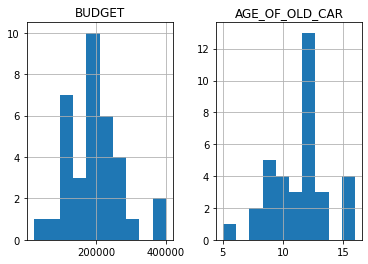

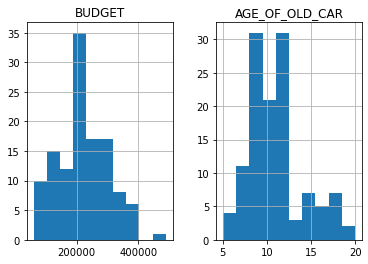

In [89]:
genq.hist()

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

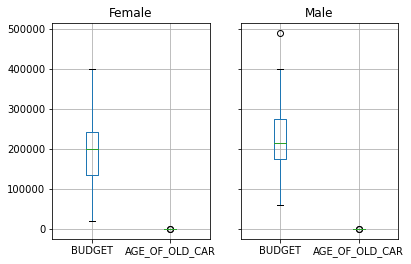

In [91]:
genq.boxplot()

In [154]:
menq=enq.groupby('ENQ_MODE')
menq.describe()

BUDGET                                                              \
            count           mean            std       min       25%       50%   
ENQ_MODE                                                                        
APP          18.0  201555.555556   57792.959293   75000.0  178750.0  207500.0   
M-APP        84.0  221200.000000   78115.120484   21000.0  180000.0  220500.0   
NAV Portal    2.0  277500.000000   31819.805153  255000.0  266250.0  277500.0   
TVWEB        30.0  240266.666667  103125.612503   70000.0  155000.0  217500.0   

                               AGE_OF_OLD_CAR                                  \
                 75%       max          count       mean       std  min   25%   
ENQ_MODE                                                                        
APP         230000.0  300000.0           18.0   9.666667  2.910428  6.0  7.25   
M-APP       266250.0  490000.0           84.0  10.571429  2.933133  5.0  8.50   
NAV Portal  288750.0  300000.0            2.0   9.500000  0.707107  9.0  9.25   
TVWEB       343750.0  400000.0           30.0  11.633333  3.011281  7.0  9.25   

                               
             50%    75%   max  
ENQ_MODE                       
APP          9.5  11.00  17.0  
M-APP       10.0  12.00  18.0  
NAV Portal   9.5   9.75  10.0  
TVWEB       12.0  12.75  19.0

ENQ_MODE
APP           [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
M-APP         [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
NAV Portal    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
TVWEB         [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

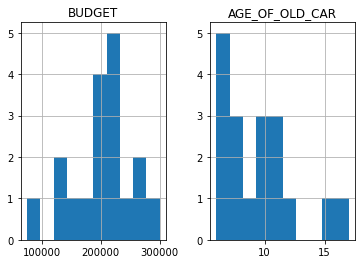

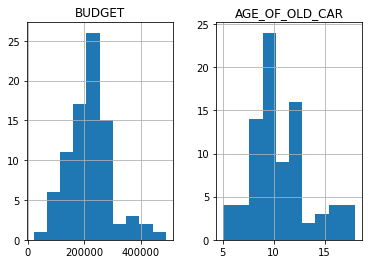

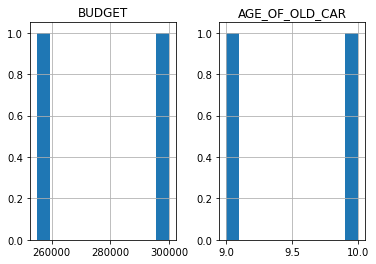

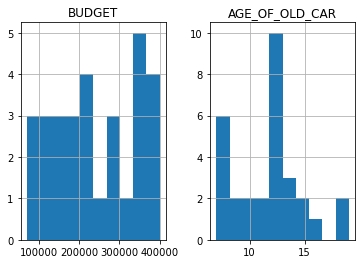

In [119]:
menq.hist()

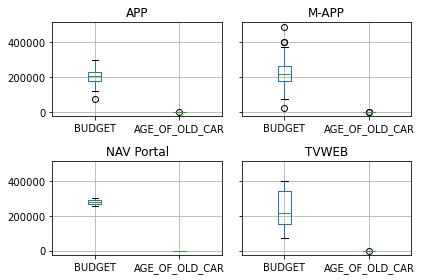

In [121]:
menq.boxplot()
plt.tight_layout()

In [148]:
wknd_enq=enq[(enq["ENQ_DATE"] =="1-Jan-22") | (enq["ENQ_DATE"] =="8-Jan-22") | (enq["ENQ_DATE"] =="15-Jan-22")|(enq["ENQ_DATE"] =="22-Jan-22")| (enq["ENQ_DATE"] =="29-Jan-22")| (enq["ENQ_DATE"] =="2-Jan-22")| (enq["ENQ_DATE"] =="9-Jan-22")| (enq["ENQ_DATE"] =="16-Jan-22")| (enq["ENQ_DATE"] =="23-Jan-22")| (enq["ENQ_DATE"] =="30-Jan-22")]

<AxesSubplot:xlabel='CAR_TYPE', ylabel='count'>

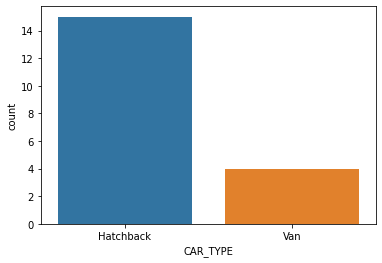

In [152]:
sns.countplot(x="CAR_TYPE",data=wknd_enq)

In [147]:
wkday_enq=enq[(enq["ENQ_DATE"] !="1-Jan-22") & (enq["ENQ_DATE"] !="8-Jan-22") & (enq["ENQ_DATE"] !="15-Jan-22")&(enq["ENQ_DATE"] !="22-Jan-22")& (enq["ENQ_DATE"] !="29-Jan-22")& (enq["ENQ_DATE"] !="2-Jan-22")& (enq["ENQ_DATE"] !="9-Jan-22")& (enq["ENQ_DATE"] !="16-Jan-22")& (enq["ENQ_DATE"] !="23-Jan-22")& (enq["ENQ_DATE"] !="30-Jan-22")]

<AxesSubplot:xlabel='CAR_TYPE', ylabel='count'>

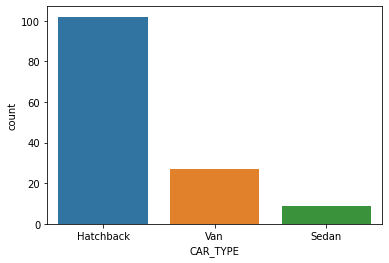

In [151]:
sns.countplot(x="CAR_TYPE",data=wkday_enq)